# Análise Exploratória

A Análise Exploratória é uma fase importante de uma tarefa de Ciência de Dados. É nesta fase que buscamos entender os dados com os seguintes objetivos:

- Identificar padrões iniciais
- Formular perguntas de pesquisa e hipóteses
- Identificar dados incompletos ou não confiáveis

Para atingir os objetivos, em geral usa-se uma combinação de análises estatísticas com uma grande ênfase em geração e interpretação de gráficos.

## Leitura e análise inicial dos dados


In [1]:
# Importação de Bibliotecas
import pandas as pd

%matplotlib inline

# lê o arquivo CSV
df = pd.read_csv('../data/aluguel.csv')

O primeiro passo ao se analisar dados desconhecidos é visualizar algumas linhas de dados:

In [2]:
df.head(10)

,codigo,endereco,quartos,suite,area,vaga,aluguel,condominio,data
0,34,Rua Desembargador Westphalen,2,0,90,0,900,371,11/10/17
1,167,Rua Jose Loureiro,2,0,64,0,650,428,15/07/17
2,6784,Rua Jose Loureiro,2,0,81,0,1100,400,23/08/17
3,82,Rua Lourenço Pinto,2,0,50,0,1350,300,19/09/17
4,2970,Rua Lourenço Pinto,2,0,63,0,1300,300,05/08/17
5,34197,Alameda Doutor Muricy,2,0,80,1,900,410,23/10/17
6,5072,Alameda Doutor Muricy,2,0,84,0,1100,382,02/09/17
7,469,Rua Desembargador Westphalen,1,0,30,0,550,210,03/07/17
8,24,Rua Desembargador Westphalen,1,0,60,1,800,120,30/09/17
9,74,Avenida Visconde de Guarapuava,2,1,132,1,1800,520,12/10/17


O método `describe` é útil para se ter uma idéia de estatísticas básicas para as variáveis numéricas. Por exemplo, abaixo podemos ver que a média dos valores de aluguel é 898 enquanto a mediana (50 percentil) é 900.

In [4]:
df.describe()

,codigo,quartos,suite,area,vaga,aluguel,condominio
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.00000
mean,31557.200000,1.500000,0.050000,64.650000,0.35000,898.000000,335.85000
std,67034.809578,0.512989,0.223607,24.303509,0.48936,326.102987,92.21558
min,24.000000,1.000000,0.000000,30.000000,0.00000,550.000000,120.00000
25%,145.750000,1.000000,0.000000,46.500000,0.00000,600.000000,300.00000
50%,4021.000000,1.500000,0.000000,63.500000,0.00000,900.000000,350.00000
75%,36848.500000,2.000000,0.000000,80.000000,1.00000,1100.000000,401.25000
max,294579.000000,2.000000,1.000000,132.000000,1.00000,1800.000000,520.00000


## Visualização da distribuição de variáveis

Visualizar as distribuições das variaveis nos ajuda a identificar os primeiros padrões. Abaixo exibimos os histogramas para `aluguel` e `condomínio`. É possivel ver que a maior concentração de apartamentos é de aluguéis entre 600 e 900. Há também uma concentração menor em aluguéis em torno de 1200. Já a distribuição dos condomínios é mais homogênea, com a maior parte dos valores por volta de 370.

Faz sentido este comportamento? Aparentemente o condomínio não varia na mesma proporção do valor do aluguel. Ou seja, se um apartamento de 600 paga 300 de condomínio, não se espera que um apartamento de 1200 pague 600 de condomínio. Esta pode ser uma questão a se explorar em passos futuros das análises.

<AxesSubplot:>

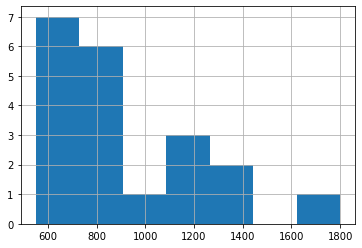

In [5]:
df['aluguel'].hist(bins=7)

<AxesSubplot:>

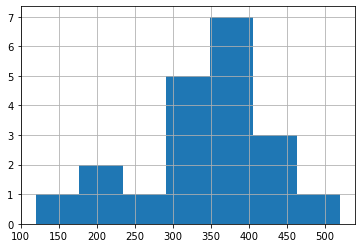

In [6]:
df['condominio'].hist(bins=7)

Podemos também exibir as distribuições usando KDEs:

<AxesSubplot:ylabel='Density'>

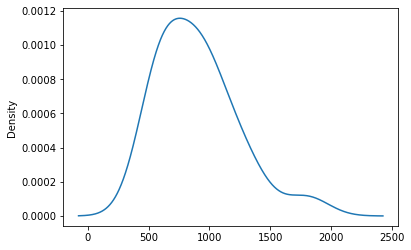

In [8]:
df['aluguel'].plot.kde()

<AxesSubplot:ylabel='Density'>

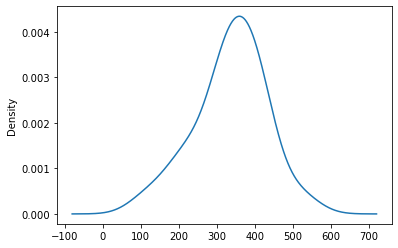

In [9]:
df['condominio'].plot.kde()

Outra forma de visualizar a distribuição de variáveis é através de Box Plots. Abaixo exibimos uma gráfico para aluguéis e condomínios. Novamente, podemos perceber que a variação nos aluguéis é maior que nos condomínios. Nos condomínios podemos ver tambem um outlier (círculo abaixo da barra). Verifique os dados e identifique qual apartamento tem este valor de condomínio tão diferente.

<AxesSubplot:>

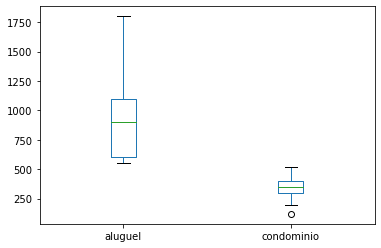

In [10]:
df[['aluguel', 'condominio']].plot.box()



## Análise da correlação entre as variáveis

Para identificar associações entre as variáveis podemos utilizar diversas ferramentas estatísticas e visuais. Para calcular a correlação (Pearson) entre todos os pares de variáves, podemos usar o método `corr`. Abaixo podemos ver que a maior correlação está entre a área do apartamento e o aluguel. Isto significa que, aparentemente, o tamanho do apartamento é o que mais influencia no valor total.

In [11]:
df.corr()

,codigo,quartos,suite,area,vaga,aluguel,condominio
codigo,1.000000,-0.335195,-0.110545,-0.324856,-0.104901,-0.300360,0.070605
quartos,-0.335195,1.000000,0.229416,0.542466,-0.104828,0.619797,0.214173
suite,-0.110545,0.229416,1.000000,0.652274,0.312641,0.651048,0.470034
area,-0.324856,0.542466,0.652274,1.000000,0.533035,0.748196,0.466627
vaga,-0.104901,-0.104828,0.312641,0.533035,1.000000,0.251974,-0.087415
aluguel,-0.300360,0.619797,0.651048,0.748196,0.251974,1.000000,0.302494
condominio,0.070605,0.214173,0.470034,0.466627,-0.087415,0.302494,1.000000


Uma forma interessante de visualizar a matrix de correlações é usar um Heatmap. No caso abaixo usamos cores azuis para identificar as correlações maiores e cores vermelhas para as menores.

In [12]:
df_corr = df.corr()
df_corr = df_corr.style.background_gradient(cmap='RdBu')
df_corr

,codigo,quartos,suite,area,vaga,aluguel,condominio
codigo,1.000000,-0.335195,-0.110545,-0.324856,-0.104901,-0.300360,0.070605
quartos,-0.335195,1.000000,0.229416,0.542466,-0.104828,0.619797,0.214173
suite,-0.110545,0.229416,1.000000,0.652274,0.312641,0.651048,0.470034
area,-0.324856,0.542466,0.652274,1.000000,0.533035,0.748196,0.466627
vaga,-0.104901,-0.104828,0.312641,0.533035,1.000000,0.251974,-0.087415
aluguel,-0.300360,0.619797,0.651048,0.748196,0.251974,1.000000,0.302494
condominio,0.070605,0.214173,0.470034,0.466627,-0.087415,0.302494,1.000000


A correlação é uma boa medida de associação entre variáveis, mas ela não oferece detalhes sobre a distribuição ou sobre a presença de outliers. Para se ter uma ideia melhor das associações, é interessante visualizar os dados no plano cartesiano. Para isto podemos construir uma matriz com as visualizações dos pontos para todas as combinações de variáveis. Abaixo fazemos isto para área, aluguel e condomínio. Veja que entre aluguel e área há realmente uma tendência de associação (maior concentração de pontos próximos à diagonal).

array([[<AxesSubplot:xlabel='area', ylabel='area'>,
        <AxesSubplot:xlabel='aluguel', ylabel='area'>,
        <AxesSubplot:xlabel='condominio', ylabel='area'>],
       [<AxesSubplot:xlabel='area', ylabel='aluguel'>,
        <AxesSubplot:xlabel='aluguel', ylabel='aluguel'>,
        <AxesSubplot:xlabel='condominio', ylabel='aluguel'>],
       [<AxesSubplot:xlabel='area', ylabel='condominio'>,
        <AxesSubplot:xlabel='aluguel', ylabel='condominio'>,
        <AxesSubplot:xlabel='condominio', ylabel='condominio'>]],
      dtype=object)

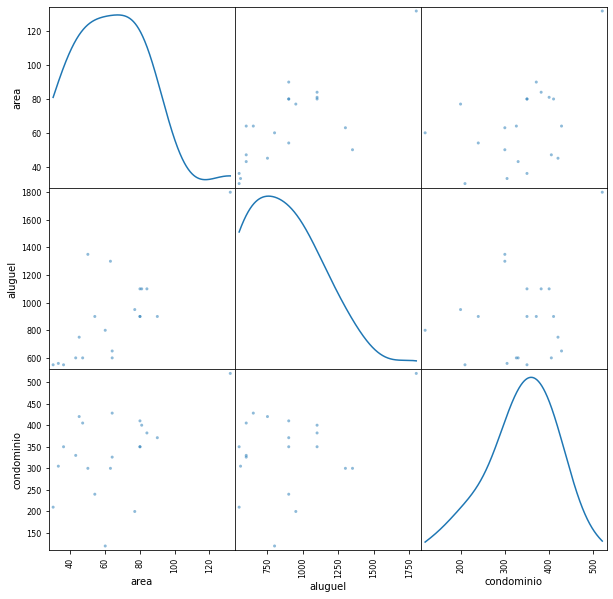

In [13]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[['area','aluguel','condominio']], figsize=(10, 10), diagonal='kde')

Podemos também construir um gráfico isolando apenas duas variáveis para explorar com mais detalhes:

<AxesSubplot:xlabel='area', ylabel='aluguel'>

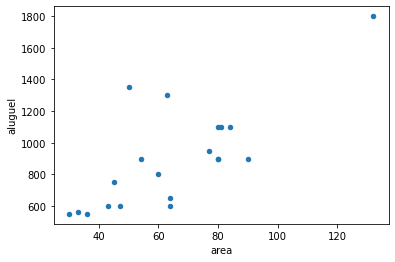

In [14]:
df.plot.scatter(x='area', y='aluguel')

Uma visualização útil para comparar mais de duas variáveis é o Parallel Coordinates. Abaixo plotamos linhas em azul representando apartamentos com 2 quartos e linhas verdes para os de 1 quarto. É possivel observar que apartamentos de dois quartos tendem a ter área e valor de aluguel mais altos. Já o valor do condomínio não demonstra uma superioridade tão marcante para os apartamentos de 2 quartos.

<AxesSubplot:>

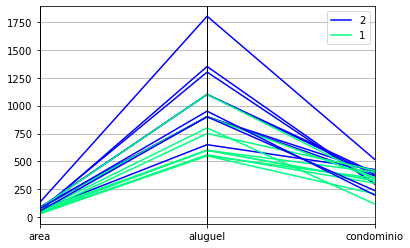

In [15]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df[['area','aluguel','condominio', 'quartos']], 'quartos', colormap='winter')

## Comparando proporções

Podemos usar gráficos de pizza para comparar proporções de partes. Abaixo calculamos o total de ofertas de apartamentos por número de vagas e exibimos o resultado em um gráfico de pizza.

<AxesSubplot:ylabel='Total vagas'>

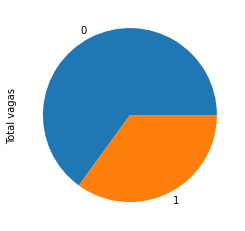

In [16]:
df_vagas = df.groupby('vaga').size().rename('Total vagas')
df_vagas.plot.pie()

Poderíamos também ter usado um gráfico de barras:

<AxesSubplot:xlabel='vaga'>

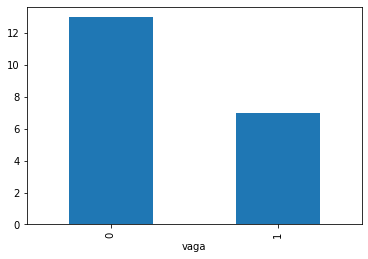

In [17]:
df_vagas.plot.bar()

Gráficos de barras também são úteis para comparar valores individuais, como abaixo. É fácil identificar quais são os apartamentos com valores maiores e menores.

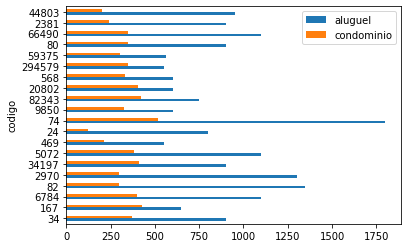

In [16]:
df.plot.barh(x='codigo', y=['aluguel', 'condominio'])

## Analisando tendências de crescimento



Quando analisamos dados sequenciais (por exemplo dados temporais), é interessante plotar linhas que demonstrem a tendência de crescimento ao longo do tempo. Abaixo exibimos os valores de apartamentos de acordo com a data de registro da oferta. Esta não é uma boa visualização porque ela não deixa claro se a variação é referente ao período ou a fatores específicos do apartamento (como área ou número de quartos).

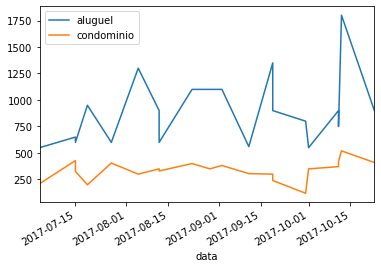

In [17]:
# converte coluna data para o tipo datetime
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%y')

df.set_index('data').sort_index()[['aluguel', 'condominio']].plot()

Uma visualização temporal mais interessante pode ser obtida se calcularmos a média dos valores de aluguel para cada mês. Abaixo calculamos e exibimos os valores médios de aluguel e condomínio por mês. Agora sim podemos identificar que aparentemente há um aumento nos valores no mês de agosto.

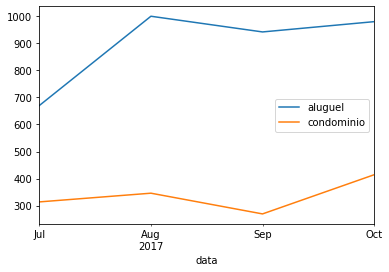

In [18]:
periodo = df.data.dt.to_period("M")  # transforma datas em mês/ano

df.groupby(periodo)[['aluguel', 'condominio']].mean().plot()

### Referências

- Documentção do Pandas: [Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
